In [56]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
# from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from numpy import random, float
import numpy as np
%matplotlib inline

iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [57]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features_std, iris.target, test_size=.3, random_state=33)

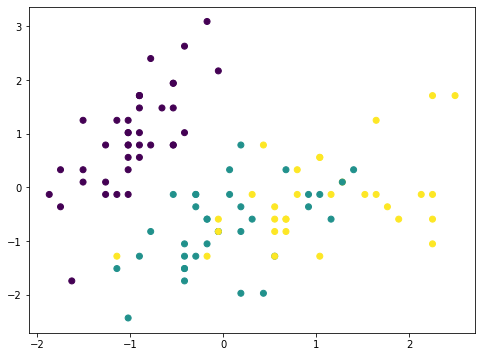

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain)
plt.show()

In [59]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

In [60]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    cv = KFold(K, shuffle=True, random_state=0)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

evaluate_cross_validation(svc_1, xtrain, ytrain, 5)

[1.         1.         0.95238095 0.9047619  0.85714286]
Mean score: 0.943 (+/-0.028)


#### Plot observations and decision boundary hyperplane

In [61]:
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

In [62]:
# Create support vector classifier with a linear kernel
svc_linear = SVC(kernel="rbf", random_state=0, C=1)
# Train model
xtrain2=xtrain[:,:2]
svc_linear.fit(xtrain2, ytrain)

SVC(C=1, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


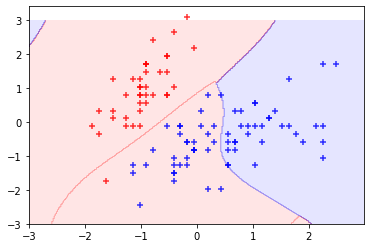

In [63]:
plot_decision_regions(xtrain2, ytrain, classifier=svc_linear)
plt.show();